In [1]:
import akshare as ak

data = ak.index_global_hist_em(symbol="日经225")
data.to_csv("data/nikkei225.csv", index=False)

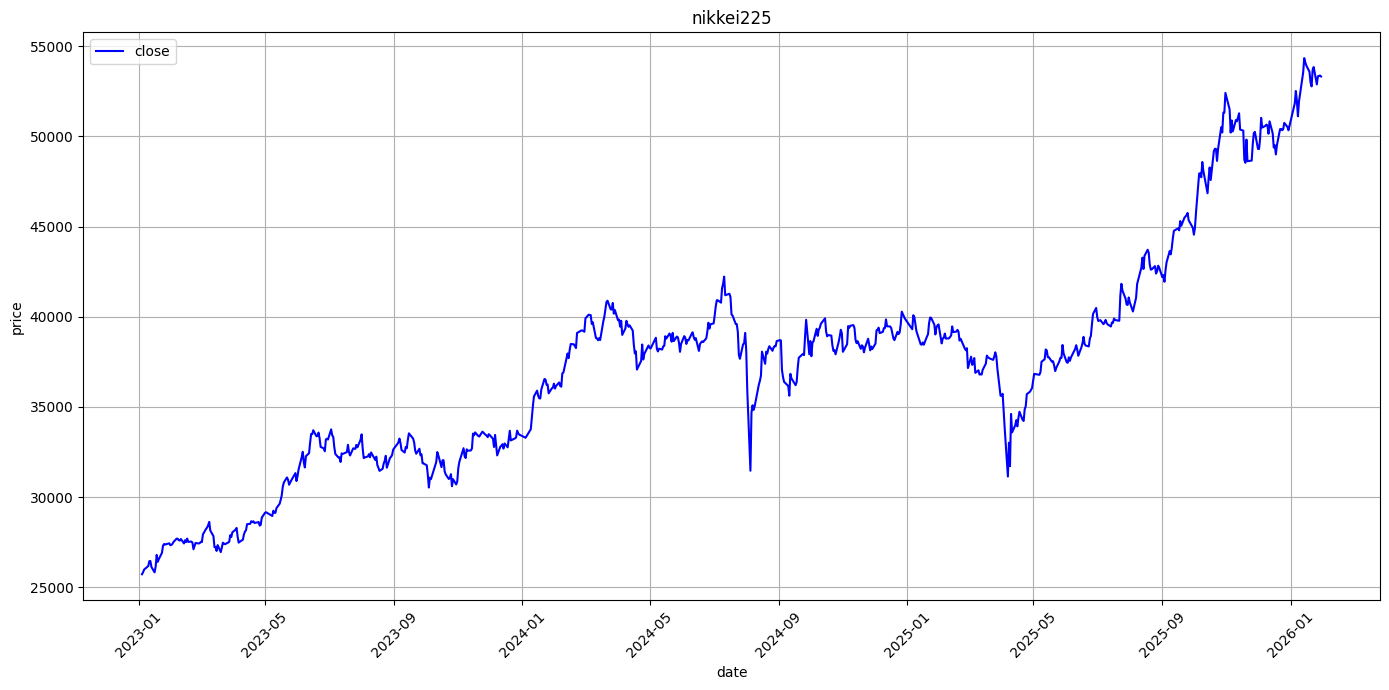

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("data/nikkei225.csv")
data["日期"] = pd.to_datetime(data["日期"], format="%Y-%m-%d")
data = data[data['日期'] >= pd.to_datetime("2023-01-01")]

plt.figure(figsize=(14, 7))
plt.plot(data["日期"], data["最新价"], label="close", color='blue')
plt.title("nikkei225")
plt.xlabel("date")
plt.ylabel("price")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("output/nikkei225_plot.png", dpi=300)
plt.show()

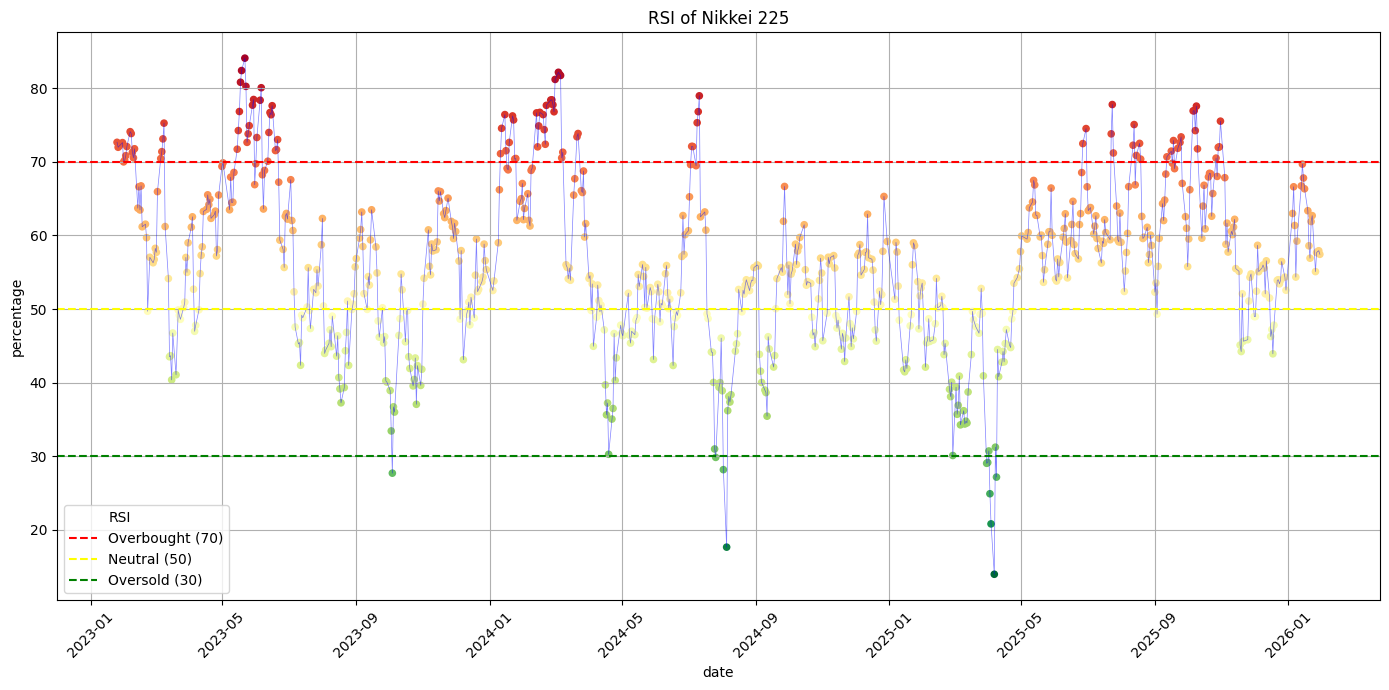

In [3]:
from src.calculate_rsi import calculate_rsi

data["rsi"] = calculate_rsi(data["最新价"].tolist(), window=14)

plt.figure(figsize=(14, 7))
scatter = plt.scatter(data["日期"], data["rsi"], c=data["rsi"], cmap='RdYlGn_r', s=20, label="RSI")
plt.plot(data["日期"], data["rsi"], color='blue', alpha=0.5, linewidth=0.5)
# plt.colorbar(scatter, label='RSI Value')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(50, color='yellow', linestyle='--', label='Neutral (50)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title("RSI of Nikkei 225")
plt.xlabel("date")
plt.ylabel("percentage")
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("output/nikkei225_rsi_plot.png", dpi=300)
plt.show()